In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
df = pd.read_csv("housing.csv")

In [63]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

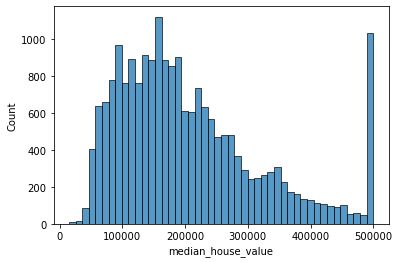

In [64]:
sns.histplot(data=df, x='median_house_value')

In [65]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [66]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [68]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [69]:
df.population.median()

1166.0

In [70]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [71]:
idx = np.arange(n)

In [72]:
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [73]:
np.random.seed(42)
np.random.shuffle(idx)

In [77]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [78]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [79]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [80]:
y_train = np.log1p(df_train["median_house_value"])
y_val = np.log1p(df_val["median_house_value"])
y_test = np.log1p(df_test["median_house_value"])

In [81]:
df_train = df_train.drop(columns=["median_house_value"])
df_val = df_val.drop(columns=["median_house_value"])
df_test = df_test.drop(columns=["median_house_value"])

In [82]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566


In [83]:
y_train

20046    10.772708
3024     10.732061
15663    13.122367
20484    12.295003
9814     12.535380
           ...    
10292    13.041806
16722    12.234665
11730    11.896833
5993     11.930326
15993    12.948726
Name: median_house_value, Length: 12384, dtype: float64

# Dealing with missing values

In [86]:
# fill with 0
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)